In [1]:
import pandas as pd
from pathlib import Path

CLEAN_DIR = Path("../data_cleaned")


In [2]:
# Load all cleaned CSVs
all_dfs = []

for path in sorted(CLEAN_DIR.glob("*_cleaned.csv")):
    print("Loading:", path.name)
    df = pd.read_csv(path)
    all_dfs.append(df)

# Concatenate into one DataFrame
df_all = pd.concat(all_dfs, ignore_index=True)
print("Total rows:", len(df_all))

df_all.head()


Loading: amazon_india_2015_cleaned.csv
Loading: amazon_india_2016_cleaned.csv
Loading: amazon_india_2017_cleaned.csv
Loading: amazon_india_2018_cleaned.csv
Loading: amazon_india_2019_cleaned.csv
Loading: amazon_india_2020_cleaned.csv
Loading: amazon_india_2021_cleaned.csv
Loading: amazon_india_2022_cleaned.csv
Loading: amazon_india_2023_cleaned.csv
Loading: amazon_india_2024_cleaned.csv
Loading: amazon_india_2025_cleaned.csv
Total rows: 1127609


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-01-05,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,"21,947.26",0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,FALSE,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1


In [3]:
combined_path = CLEAN_DIR / "all_years_combined.csv"
df_all.to_csv(combined_path, index=False)
combined_path


WindowsPath('../data_cleaned/all_years_combined.csv')

In [4]:
import pandas as pd
from pathlib import Path

CLEAN_DIR = Path("../data_cleaned")


In [5]:
all_dfs = []

for path in sorted(CLEAN_DIR.glob("*_cleaned.csv")):
    print("Loading:", path.name)
    df = pd.read_csv(path)
    all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)


Loading: amazon_india_2015_cleaned.csv
Loading: amazon_india_2016_cleaned.csv
Loading: amazon_india_2017_cleaned.csv
Loading: amazon_india_2018_cleaned.csv
Loading: amazon_india_2019_cleaned.csv
Loading: amazon_india_2020_cleaned.csv
Loading: amazon_india_2021_cleaned.csv
Loading: amazon_india_2022_cleaned.csv
Loading: amazon_india_2023_cleaned.csv
Loading: amazon_india_2024_cleaned.csv
Loading: amazon_india_2025_cleaned.csv


In [6]:
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1127609 non-null  object 
 1   order_date              1127609 non-null  object 
 2   customer_id             1127609 non-null  object 
 3   product_id              1127609 non-null  object 
 4   product_name            1127609 non-null  object 
 5   category                1127609 non-null  object 
 6   subcategory             1127609 non-null  object 
 7   brand                   1127609 non-null  object 
 8   original_price_inr      1127609 non-null  object 
 9   discount_percent        1127609 non-null  float64
 10  discounted_price_inr    1127609 non-null  float64
 11  quantity                1127609 non-null  int64  
 12  subtotal_inr            1127609 non-null  float64
 13  delivery_charges        1037408 non-null  float64
 14  fi

In [7]:
df_all['order_year'].value_counts().sort_index()


order_year
2015     33165
2016     55275
2017     77385
2018     99495
2019    121605
2020    143715
2021    138187
2022    132660
2023    127132
2024    121605
2025     77385
Name: count, dtype: int64

In [8]:
year_summary = (
    df_all
    .groupby('order_year')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue_inr=('final_amount_inr', 'sum'),
        avg_order_value_inr=('final_amount_inr', 'mean')
    )
    .reset_index()
)

year_summary


,order_year,total_orders,total_revenue_inr,avg_order_value_inr
0,2015,33165,2.142163e+09,64591.089351
1,2016,55275,3.598316e+09,65098.431828
2,2017,77385,5.510026e+09,71202.761606
3,2018,99495,7.248545e+09,72853.358575
4,2019,121605,8.605901e+09,70769.300522
5,2020,143715,1.187319e+10,82616.249430
6,2021,138187,1.099021e+10,79531.430632
7,2022,132660,8.532312e+09,64317.144175
8,2023,127132,7.712999e+09,60669.217705
9,2024,121605,6.823413e+09,56111.288750


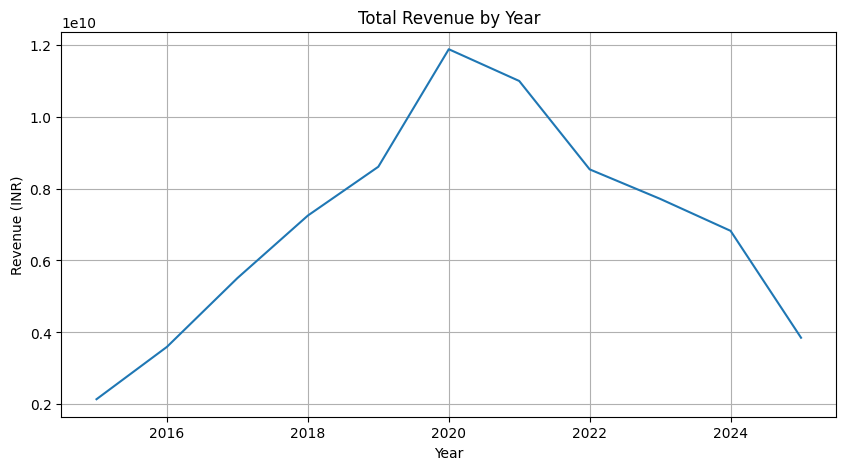

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(year_summary['order_year'], year_summary['total_revenue_inr'])
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()


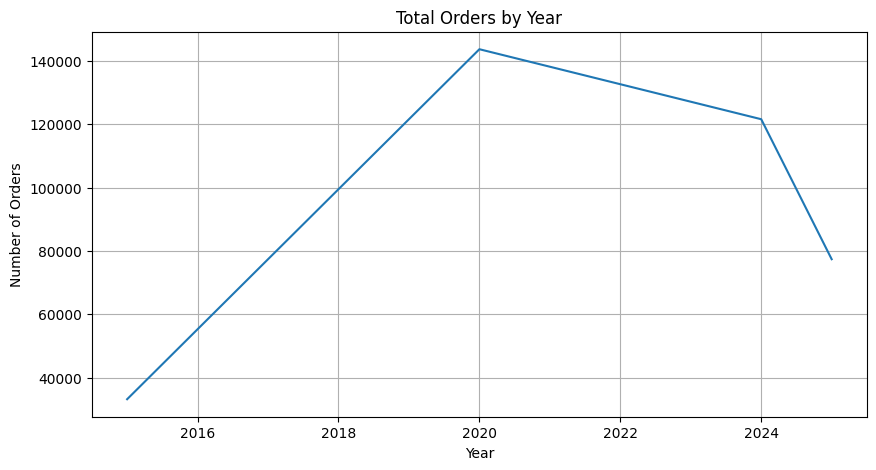

In [10]:
plt.figure(figsize=(10,5))
plt.plot(year_summary['order_year'], year_summary['total_orders'])
plt.title("Total Orders by Year")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


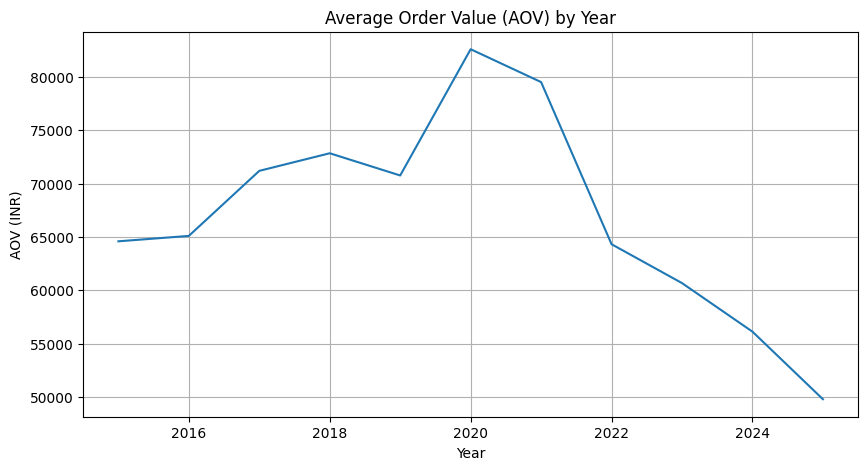

In [11]:
plt.figure(figsize=(10,5))
plt.plot(year_summary['order_year'], year_summary['avg_order_value_inr'])
plt.title("Average Order Value (AOV) by Year")
plt.xlabel("Year")
plt.ylabel("AOV (INR)")
plt.grid(True)
plt.show()


In [12]:
prime_summary = (
    df_all.groupby('is_prime_member')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum'),
        avg_order_value=('final_amount_inr', 'mean')
    )
    .reset_index()
)

prime_summary


,is_prime_member,total_orders,total_revenue,avg_order_value
0,0,21078,1.305587e+09,61940.724103
1,1,12871,1.015507e+09,78898.804276
2,FALSE,21086,1.307972e+09,62030.368027
3,False,635593,3.942185e+10,62023.737982
4,No,20728,1.294507e+09,62452.112347
5,TRUE,12684,9.922969e+08,78232.177672
6,True,390675,3.054434e+10,78183.496827
7,Yes,12894,1.006668e+09,78072.629591


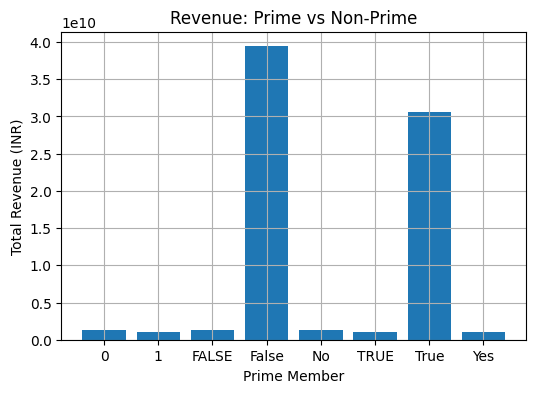

In [13]:
plt.figure(figsize=(6,4))
plt.bar(prime_summary['is_prime_member'], prime_summary['total_revenue'])
plt.title("Revenue: Prime vs Non-Prime")
plt.xlabel("Prime Member")
plt.ylabel("Total Revenue (INR)")
plt.grid(True)
plt.show()


In [14]:
tier_summary = (
    df_all.groupby('customer_tier')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum'),
        avg_order_value=('final_amount_inr', 'mean')
    )
    .reset_index()
)

tier_summary


,customer_tier,total_orders,total_revenue,avg_order_value
0,Metro,563829,4.242541e+10,75245.175711
1,Rural,49992,2.323583e+09,46479.103492
2,Tier1,338631,2.218988e+10,65528.206667
3,Tier2,175157,9.949852e+09,56805.334035


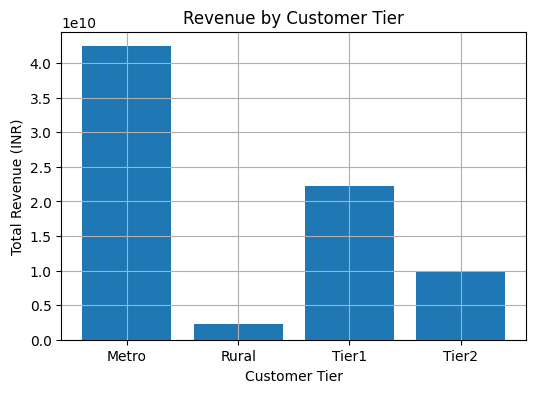

In [15]:
plt.figure(figsize=(6,4))
plt.bar(tier_summary['customer_tier'], tier_summary['total_revenue'])
plt.title("Revenue by Customer Tier")
plt.xlabel("Customer Tier")
plt.ylabel("Total Revenue (INR)")
plt.grid(True)
plt.show()


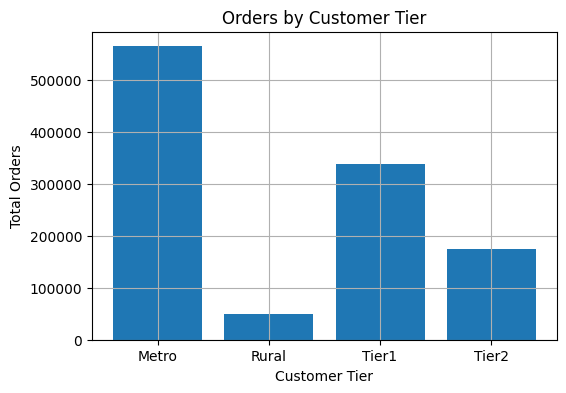

In [16]:
plt.figure(figsize=(6,4))
plt.bar(tier_summary['customer_tier'], tier_summary['total_orders'])
plt.title("Orders by Customer Tier")
plt.xlabel("Customer Tier")
plt.ylabel("Total Orders")
plt.grid(True)
plt.show()


In [17]:
age_summary = (
    df_all.groupby('customer_age_group')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum'),
        avg_order_value=('final_amount_inr', 'mean')
    )
    .reset_index()
)

age_summary


,customer_age_group,total_orders,total_revenue,avg_order_value
0,18-25,316424,2.158446e+10,68213.728864
1,26-35,347899,2.379305e+10,68390.679847
2,36-45,199100,1.354666e+10,68039.481598
3,46-55,99012,6.738818e+09,68060.619683
4,55+,29859,2.021196e+09,67691.334308


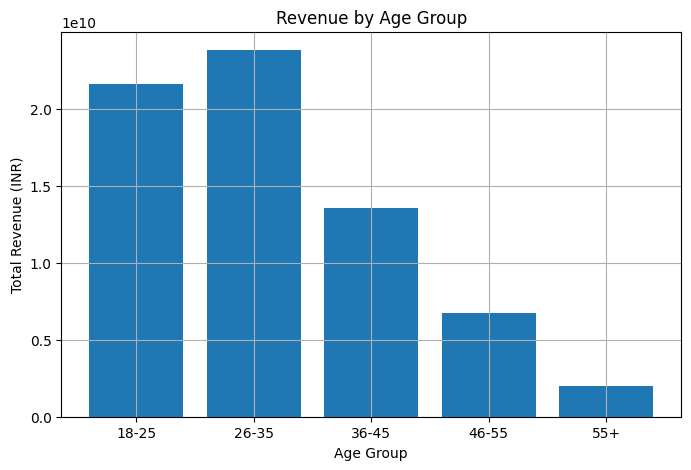

In [18]:
plt.figure(figsize=(8,5))
plt.bar(age_summary['customer_age_group'], age_summary['total_revenue'])
plt.title("Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue (INR)")
plt.grid(True)
plt.show()


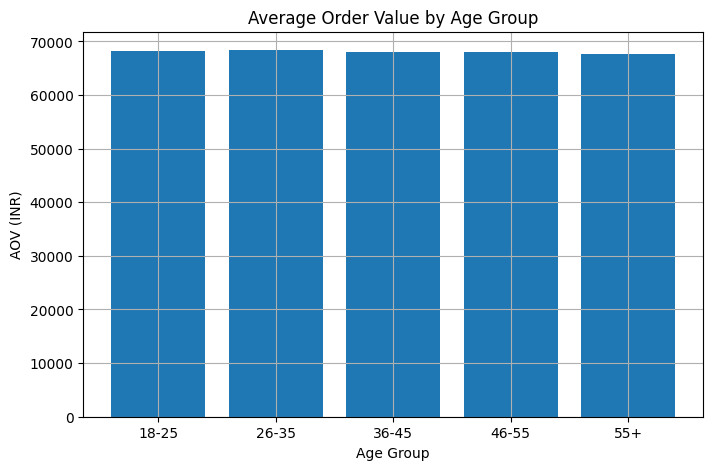

In [19]:
plt.figure(figsize=(8,5))
plt.bar(age_summary['customer_age_group'], age_summary['avg_order_value'])
plt.title("Average Order Value by Age Group")
plt.xlabel("Age Group")
plt.ylabel("AOV (INR)")
plt.grid(True)
plt.show()


In [20]:
festival_summary = (
    df_all.groupby('is_festival_sale')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum'),
        avg_order_value=('final_amount_inr', 'mean')
    )
    .reset_index()
)

festival_summary


,is_festival_sale,total_orders,total_revenue,avg_order_value
0,0,23568,1.821032e+09,77267.158199
1,1,10421,4.905620e+08,47074.364681
2,FALSE,23150,1.815954e+09,78442.946315
3,False,707951,5.484388e+10,77468.466866
4,No,23067,1.789472e+09,77577.154473
5,TRUE,10488,4.920502e+08,46915.539419
6,True,318446,1.514230e+10,47550.609245
7,Yes,10518,4.934787e+08,46917.543227


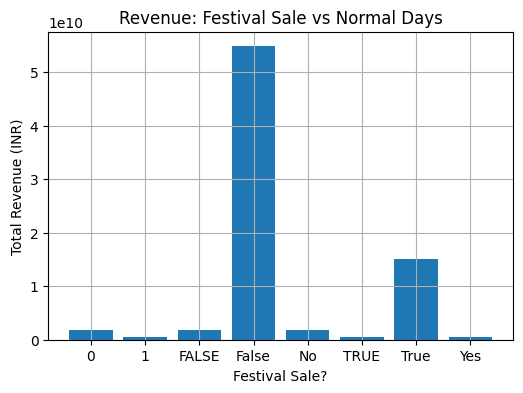

In [21]:
plt.figure(figsize=(6,4))
plt.bar(festival_summary['is_festival_sale'], festival_summary['total_revenue'])
plt.title("Revenue: Festival Sale vs Normal Days")
plt.xlabel("Festival Sale?")
plt.ylabel("Total Revenue (INR)")
plt.grid(True)
plt.show()


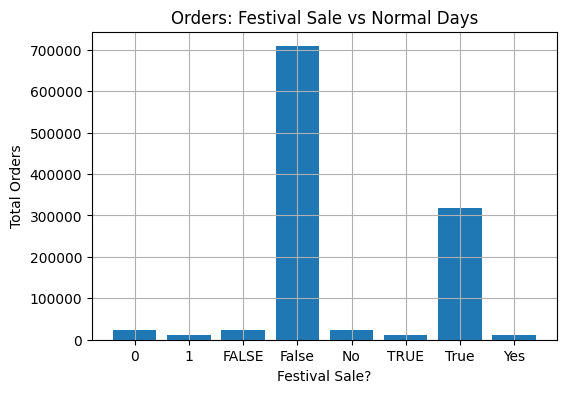

In [22]:
plt.figure(figsize=(6,4))
plt.bar(festival_summary['is_festival_sale'], festival_summary['total_orders'])
plt.title("Orders: Festival Sale vs Normal Days")
plt.xlabel("Festival Sale?")
plt.ylabel("Total Orders")
plt.grid(True)
plt.show()


In [23]:
category_summary = (
    df_all.groupby('category')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum'),
        avg_order_value=('final_amount_inr', 'mean')
    )
    .reset_index()
    .sort_values('total_revenue', ascending=False)
)

category_summary


,category,total_orders,total_revenue,avg_order_value
2,Electronics,1126726,7.683114e+10,68189.728518
1,Electronic,229,1.478714e+07,64572.642314
0,ELECTRONICS,225,1.469889e+07,65328.405822
4,Electronicss,211,1.410149e+07,66831.720047
3,Electronics & Accessories,218,1.400199e+07,64229.308761


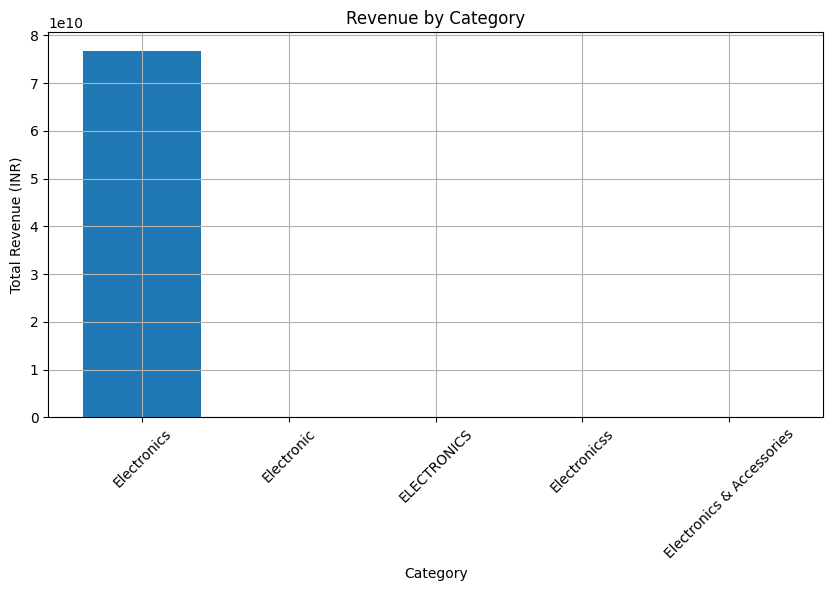

In [24]:
plt.figure(figsize=(10,5))
plt.bar(category_summary['category'], category_summary['total_revenue'])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [25]:
brand_summary = (
    df_all.groupby('brand')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum')
    )
    .reset_index()
    .sort_values('total_revenue', ascending=False)
    .head(10)
)

brand_summary


,brand,total_orders,total_revenue
22,Samsung,222664,2.062142e+10
4,Apple,111827,1.632240e+10
19,OnePlus,174329,1.232417e+10
27,Xiaomi,156154,5.450159e+09
21,Realme,84696,3.015664e+09
26,Vivo,71176,2.348077e+09
20,Oppo,71205,2.268237e+09
14,Lenovo,22733,2.084388e+09
2,Alienware,14683,1.659859e+09
0,ASUS,13062,1.458950e+09


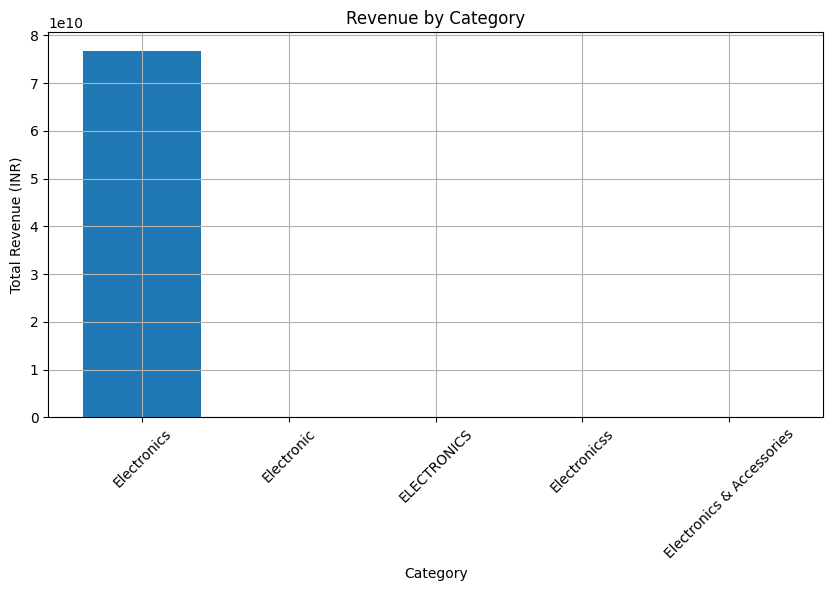

In [26]:
plt.figure(figsize=(10,5))
plt.bar(category_summary['category'], category_summary['total_revenue'])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [27]:
brand_summary = (
    df_all.groupby('brand')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum')
    )
    .reset_index()
    .sort_values('total_revenue', ascending=False)
    .head(10)
)

brand_summary


,brand,total_orders,total_revenue
22,Samsung,222664,2.062142e+10
4,Apple,111827,1.632240e+10
19,OnePlus,174329,1.232417e+10
27,Xiaomi,156154,5.450159e+09
21,Realme,84696,3.015664e+09
26,Vivo,71176,2.348077e+09
20,Oppo,71205,2.268237e+09
14,Lenovo,22733,2.084388e+09
2,Alienware,14683,1.659859e+09
0,ASUS,13062,1.458950e+09


In [28]:
return_summary = (
    df_all.groupby('category')
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_returns=('return_status', lambda x: (x == "Returned").sum())
    )
    .reset_index()
)

return_summary['return_rate_percent'] = (return_summary['total_returns'] / return_summary['total_orders']) * 100

return_summary.sort_values('return_rate_percent', ascending=False)


,category,total_orders,total_returns,return_rate_percent
4,Electronicss,211,19,9.004739
1,Electronic,229,18,7.860262
2,Electronics,1126726,79059,7.016701
3,Electronics & Accessories,218,15,6.880734
0,ELECTRONICS,225,14,6.222222


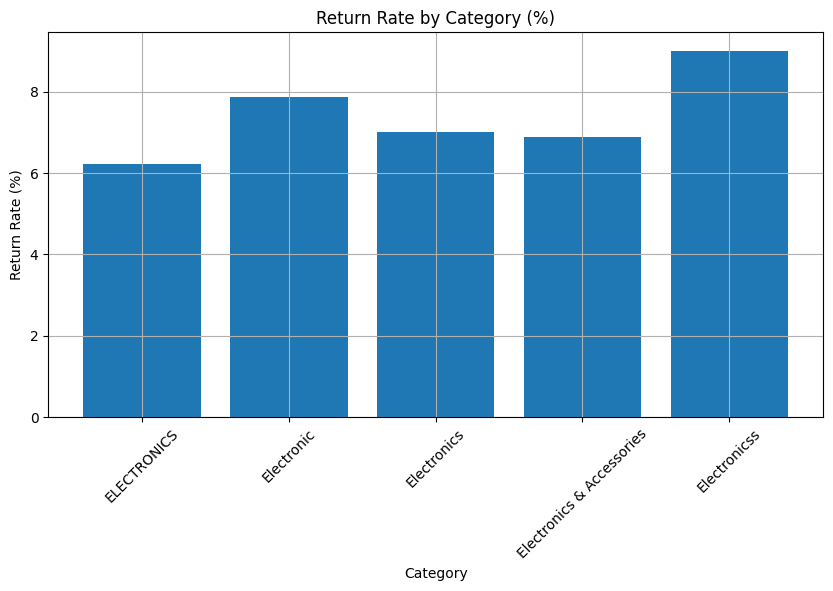

In [29]:
plt.figure(figsize=(10,5))
plt.bar(return_summary['category'], return_summary['return_rate_percent'])
plt.title("Return Rate by Category (%)")
plt.xlabel("Category")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [31]:
df_all['customer_rating'] = pd.to_numeric(df_all['customer_rating'], errors='coerce')


In [32]:
rating_summary = (
    df_all.groupby('category')
    .agg(
        avg_product_rating=('product_rating', 'mean'),
        avg_customer_rating=('customer_rating', 'mean')
    )
    .reset_index()
)

rating_summary


,category,avg_product_rating,avg_customer_rating
0,ELECTRONICS,3.991556,4.330065
1,Electronic,4.038428,4.364865
2,Electronics,3.975219,4.316064
3,Electronics & Accessories,4.001376,4.246622
4,Electronicss,4.004739,4.292593


In [33]:
monthly_summary = (
    df_all.groupby(['order_year', 'order_month'])
    .agg(
        total_orders=('transaction_id', 'nunique'),
        total_revenue=('final_amount_inr', 'sum'),
        avg_order_value=('final_amount_inr', 'mean')
    )
    .reset_index()
)

monthly_summary.head()


,order_year,order_month,total_orders,total_revenue,avg_order_value
0,2015,1,2413,1.631200e+08,67600.514256
1,2015,2,2113,1.443615e+08,68320.633374
2,2015,3,2409,1.452314e+08,60287.019074
3,2015,4,2414,1.780212e+08,73745.330949
4,2015,5,2712,1.568690e+08,57842.541674


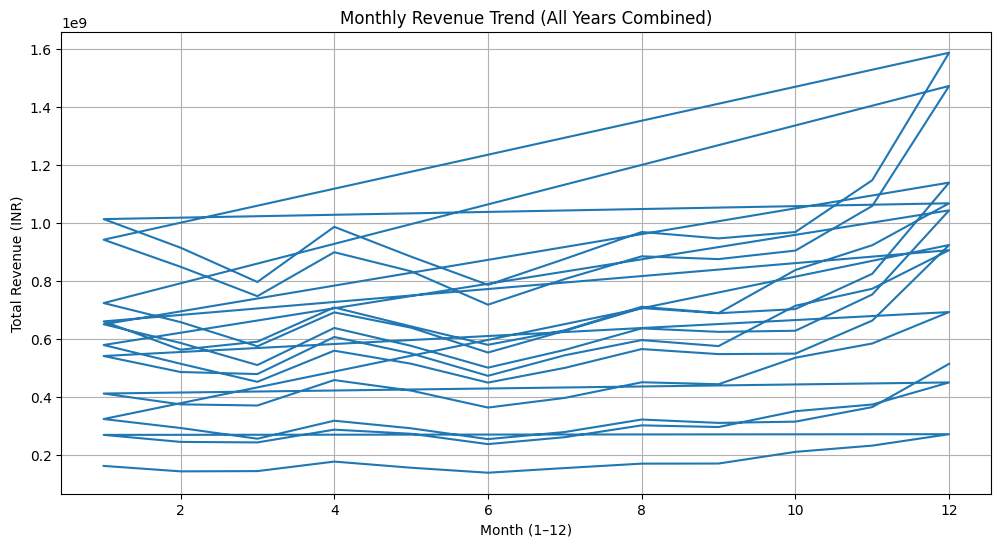

In [34]:
plt.figure(figsize=(12,6))
plt.plot(monthly_summary['order_month'], monthly_summary['total_revenue'])
plt.title("Monthly Revenue Trend (All Years Combined)")
plt.xlabel("Month (1–12)")
plt.ylabel("Total Revenue (INR)")
plt.grid(True)
plt.show()


In [35]:
quarter_summary = (
    df_all.groupby(['order_year', 'order_quarter'])
    .agg(total_revenue=('final_amount_inr', 'sum'))
    .reset_index()
)

quarter_summary


,order_year,order_quarter,total_revenue
0,2015,1,4.527130e+08
1,2015,2,4.745597e+08
2,2015,3,4.980196e+08
3,2015,4,7.168712e+08
4,2016,1,7.598107e+08
5,2016,2,7.999012e+08
6,2016,3,8.618810e+08
7,2016,4,1.176723e+09
8,2017,1,1.158573e+09
9,2017,2,1.245139e+09


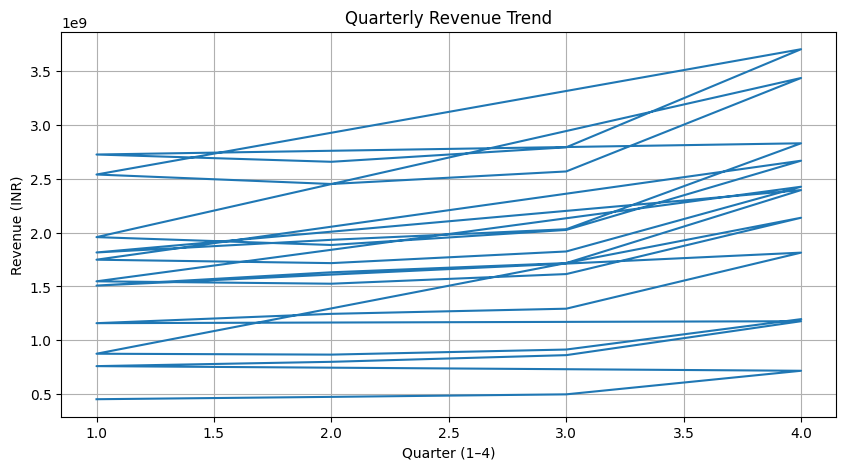

In [36]:
plt.figure(figsize=(10,5))
plt.plot(quarter_summary['order_quarter'], quarter_summary['total_revenue'])
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter (1–4)")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Make plots look nice
plt.style.use('ggplot')


In [2]:
from pathlib import Path
import pandas as pd

clean_dir = Path("../data_cleaned_v3")

# Read all cleaned_v3 CSV files
df_list = []

for file in clean_dir.glob("*_cleaned_v3.csv"):
    print("Loading:", file.name)
    df_list.append(pd.read_csv(file))

# Combine into one dataframe
df_all = pd.concat(df_list, ignore_index=True)

print("Total rows:", len(df_all))
df_all.head()


Loading: amazon_india_2015_cleaned_v3.csv
Loading: amazon_india_2016_cleaned_v3.csv
Loading: amazon_india_2017_cleaned_v3.csv
Loading: amazon_india_2018_cleaned_v3.csv
Loading: amazon_india_2019_cleaned_v3.csv
Loading: amazon_india_2020_cleaned_v3.csv
Loading: amazon_india_2021_cleaned_v3.csv
Loading: amazon_india_2022_cleaned_v3.csv
Loading: amazon_india_2023_cleaned_v3.csv
Loading: amazon_india_2024_cleaned_v3.csv
Loading: amazon_india_2025_cleaned_v3.csv
Total rows: 1127609


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-05-01,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,21947.26,0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1


In [3]:
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1127609 non-null  object 
 1   order_date              1127609 non-null  object 
 2   customer_id             1127609 non-null  object 
 3   product_id              1127609 non-null  object 
 4   product_name            1127609 non-null  object 
 5   category                1127609 non-null  object 
 6   subcategory             1127609 non-null  object 
 7   brand                   1127609 non-null  object 
 8   original_price_inr      1124817 non-null  float64
 9   discount_percent        1127609 non-null  float64
 10  discounted_price_inr    1127609 non-null  float64
 11  quantity                1127609 non-null  int64  
 12  subtotal_inr            1127609 non-null  float64
 13  delivery_charges        1037408 non-null  float64
 14  fi

In [4]:
monthly = (
    df_all.groupby(['order_year', 'order_month'])['final_amount_inr']
    .sum()
    .reset_index()
)

monthly.head()


,order_year,order_month,final_amount_inr
0,2015,1,1.631200e+08
1,2015,2,1.443615e+08
2,2015,3,1.452314e+08
3,2015,4,1.780212e+08
4,2015,5,1.568690e+08


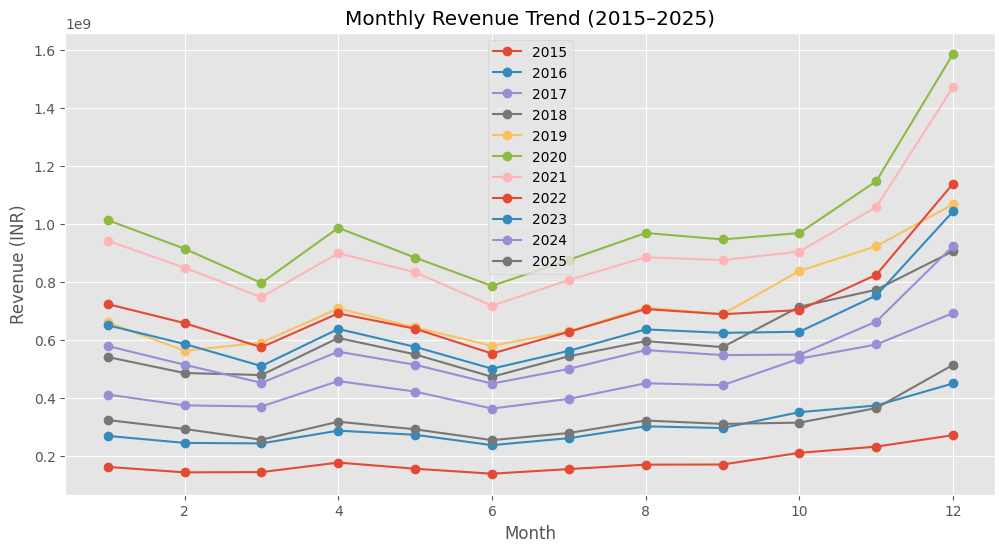

In [5]:
plt.figure(figsize=(12,6))
for year in sorted(monthly['order_year'].unique()):
    subset = monthly[monthly['order_year'] == year]
    plt.plot(subset['order_month'], subset['final_amount_inr'], marker='o', label=year)

plt.title("Monthly Revenue Trend (2015–2025)")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.legend()
plt.grid(True)
plt.show()


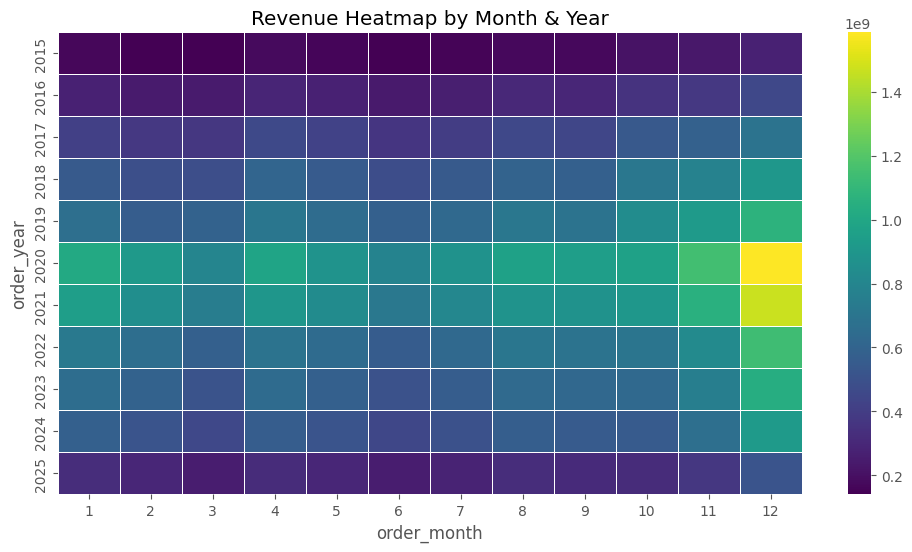

In [6]:
pivot = monthly.pivot(index="order_year", columns="order_month", values="final_amount_inr")

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="viridis", linewidths=0.5)
plt.title("Revenue Heatmap by Month & Year")
plt.show()


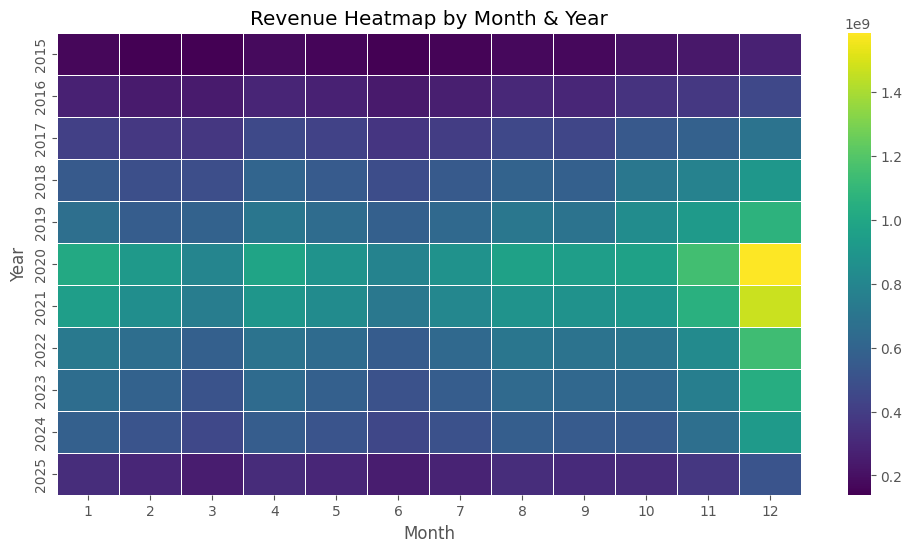

In [7]:
import seaborn as sns
plt.figure(figsize=(12,6))

pivot = monthly.pivot(index="order_year", columns="order_month", values="final_amount_inr")

sns.heatmap(pivot, cmap="viridis", linewidths=0.5)
plt.title("Revenue Heatmap by Month & Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [8]:
payment_year = (
    df_all.groupby(["order_year", "payment_method"])["final_amount_inr"]
    .sum()
    .reset_index()
)

payment_year.head()


,order_year,payment_method,final_amount_inr
0,2015,COD,1.609061e+09
1,2015,Card,4.274830e+08
2,2015,Net Banking,1.056192e+08
3,2016,COD,2.512673e+09
4,2016,Card,8.756870e+08


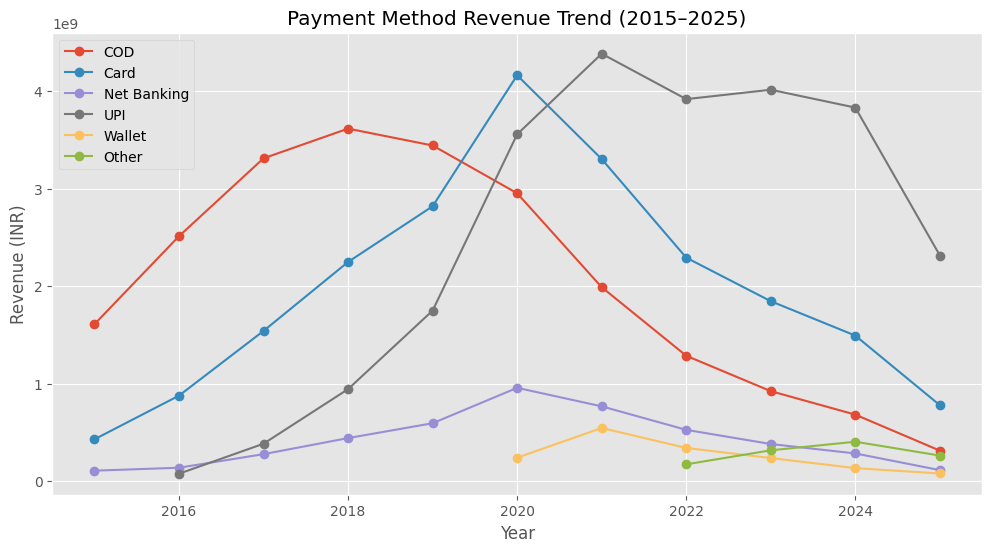

In [9]:
plt.figure(figsize=(12,6))

for method in payment_year['payment_method'].unique():
    subset = payment_year[payment_year['payment_method'] == method]
    plt.plot(subset['order_year'], subset['final_amount_inr'], marker='o', label=method)

plt.title("Payment Method Revenue Trend (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend()
plt.grid(True)
plt.show()


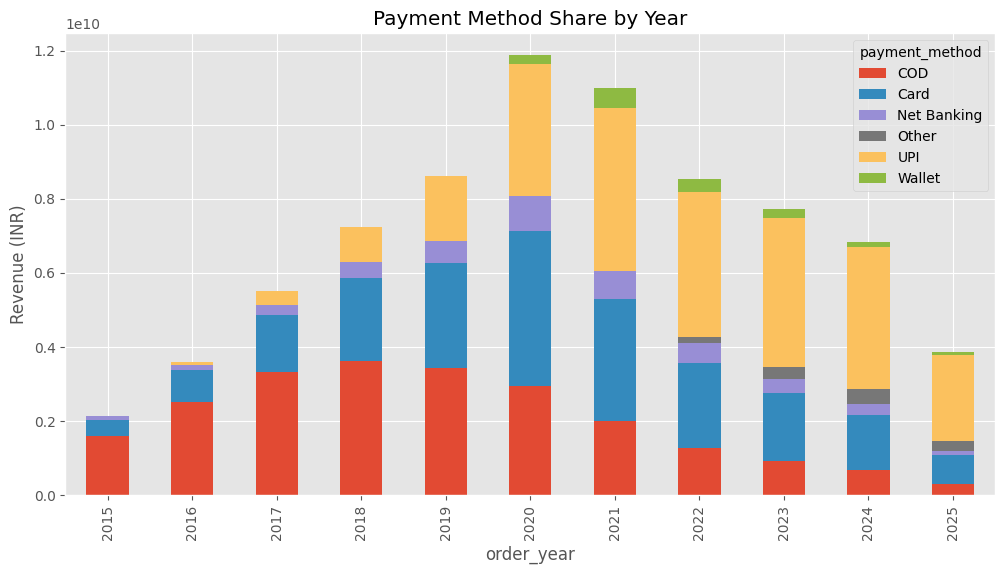

In [10]:
pivot = payment_year.pivot(index="order_year", columns="payment_method", values="final_amount_inr")

pivot.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Payment Method Share by Year")
plt.ylabel("Revenue (INR)")
plt.show()


In [12]:
state_rev = (
    df_all.groupby("customer_state")["final_amount_inr"]
    .sum()
    .sort_values(ascending=False)
)

state_rev.head(10)


customer_state
Maharashtra       1.755014e+10
Delhi             9.282344e+09
Tamil Nadu        7.923753e+09
Karnataka         7.680945e+09
Gujarat           7.183017e+09
Uttar Pradesh     6.793803e+09
West Bengal       5.053097e+09
Telangana         3.335962e+09
Rajasthan         2.644470e+09
Madhya Pradesh    2.214093e+09
Name: final_amount_inr, dtype: float64

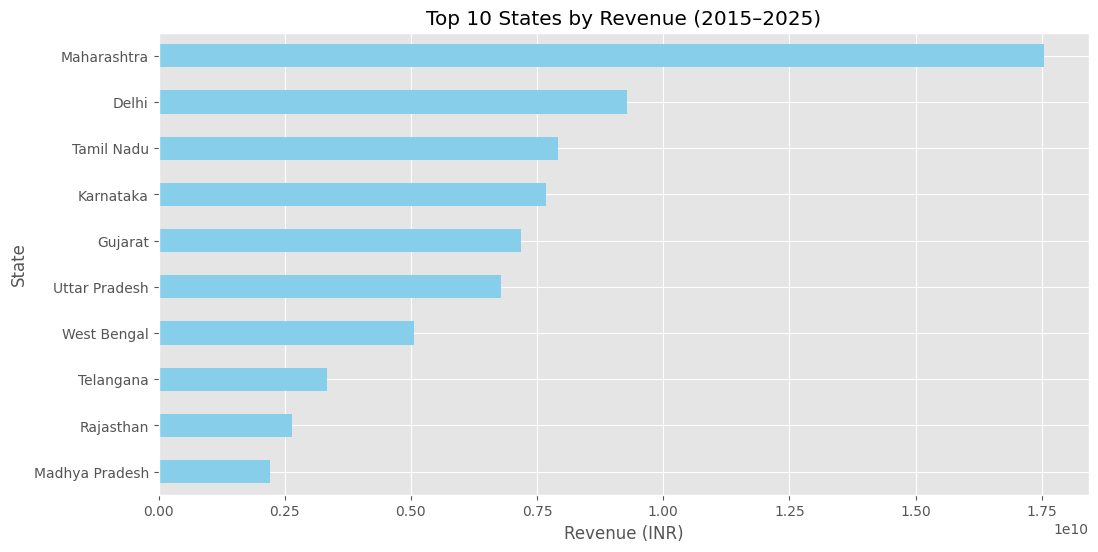

In [13]:
plt.figure(figsize=(12,6))
state_rev.head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 States by Revenue (2015–2025)")
plt.xlabel("Revenue (INR)")
plt.ylabel("State")
plt.gca().invert_yaxis()  # largest on top
plt.show()


In [14]:
city_rev = (
    df_all.groupby("customer_city")["final_amount_inr"]
    .sum()
    .sort_values(ascending=False)
)

city_rev.head(20)


customer_city
Mumbai           1.061793e+10
Delhi            9.242046e+09
Bangalore        7.621644e+09
Chennai          6.377471e+09
Kolkata          5.033587e+09
Pune             4.445595e+09
Hyderabad        3.335962e+09
Ahmedabad        3.300497e+09
Surat            2.666742e+09
Jaipur           2.644470e+09
Nagpur           2.448265e+09
Lucknow          2.244201e+09
Kanpur           2.226018e+09
Indore           2.214093e+09
Coimbatore       1.506970e+09
Kochi            1.429728e+09
Visakhapatnam    1.260290e+09
Vadodara         1.215777e+09
Patna            1.191981e+09
Bhubaneswar      1.159308e+09
Name: final_amount_inr, dtype: float64

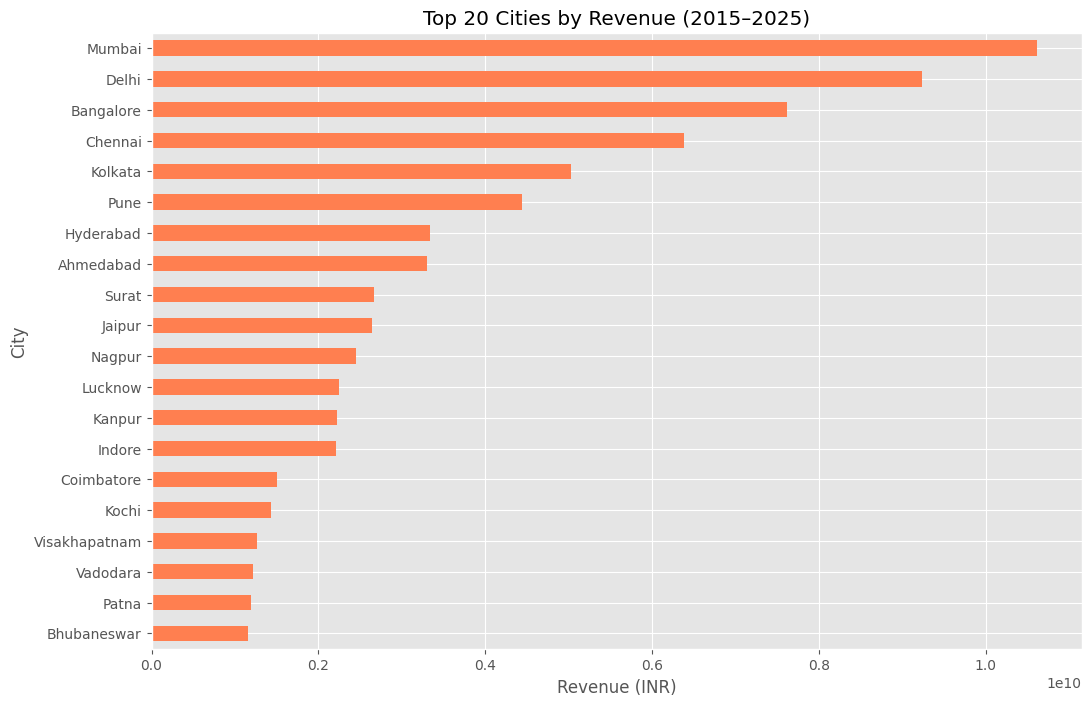

In [15]:
plt.figure(figsize=(12,8))
city_rev.head(20).plot(kind="barh", color="coral")
plt.title("Top 20 Cities by Revenue (2015–2025)")
plt.xlabel("Revenue (INR)")
plt.ylabel("City")
plt.gca().invert_yaxis()  # highest on top
plt.show()


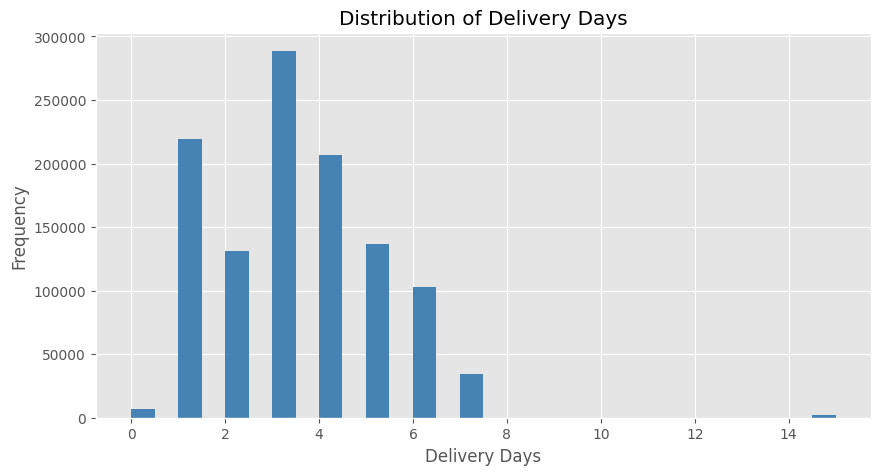

In [16]:
plt.figure(figsize=(10,5))
df_all['delivery_days'].hist(bins=30, color='steelblue')
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")
plt.show()


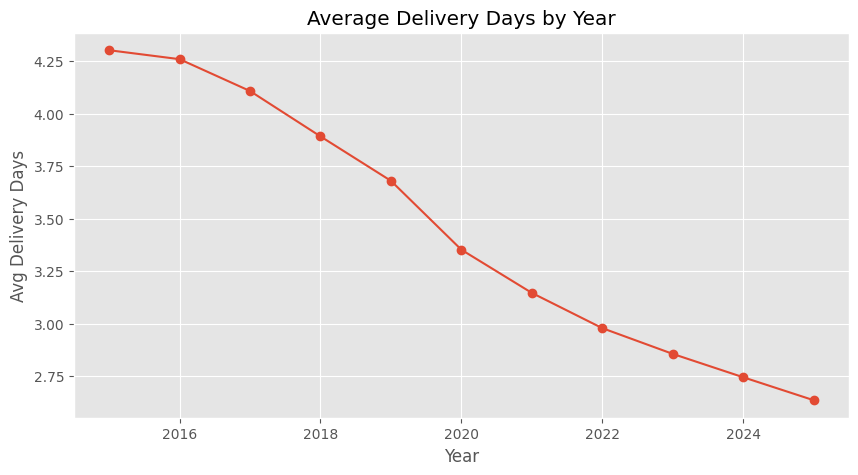

In [17]:
del_year = df_all.groupby("order_year")["delivery_days"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(del_year["order_year"], del_year["delivery_days"], marker="o")
plt.title("Average Delivery Days by Year")
plt.xlabel("Year")
plt.ylabel("Avg Delivery Days")
plt.grid(True)
plt.show()


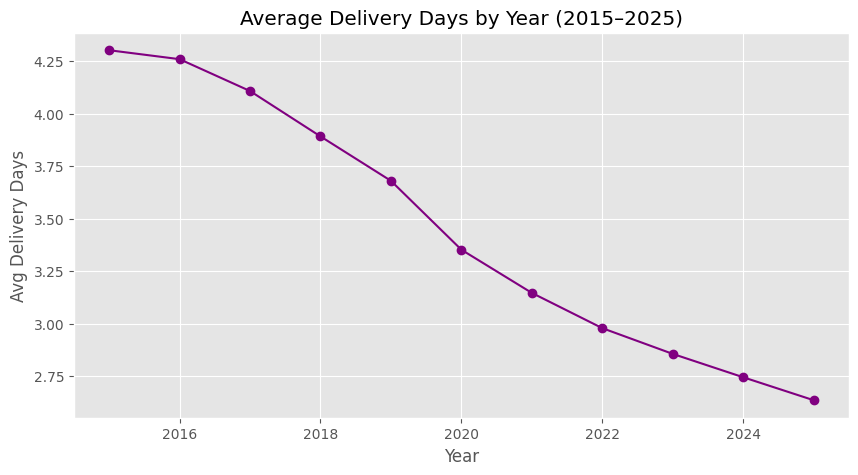

In [18]:
del_year = df_all.groupby("order_year")["delivery_days"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(del_year["order_year"], del_year["delivery_days"], marker="o", color="purple")
plt.title("Average Delivery Days by Year (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Avg Delivery Days")
plt.grid(True)
plt.show()


In [19]:
del_state = (
    df_all.groupby("customer_state")["delivery_days"]
    .mean()
    .sort_values()
)

del_state.head(10)   # fastest states


customer_state
Rajasthan         3.225991
Madhya Pradesh    3.232436
Gujarat           3.257230
Maharashtra       3.307782
Punjab            3.319061
Bihar             3.320774
Uttar Pradesh     3.323294
Andhra Pradesh    3.325348
Kerala            3.333400
Odisha            3.334115
Name: delivery_days, dtype: float64

In [20]:
del_state.tail(10)   # slowest states


customer_state
Bihar             3.320774
Uttar Pradesh     3.323294
Andhra Pradesh    3.325348
Kerala            3.333400
Odisha            3.334115
Tamil Nadu        3.348952
West Bengal       3.353538
Telangana         3.354363
Delhi             3.354939
Karnataka         3.355735
Name: delivery_days, dtype: float64

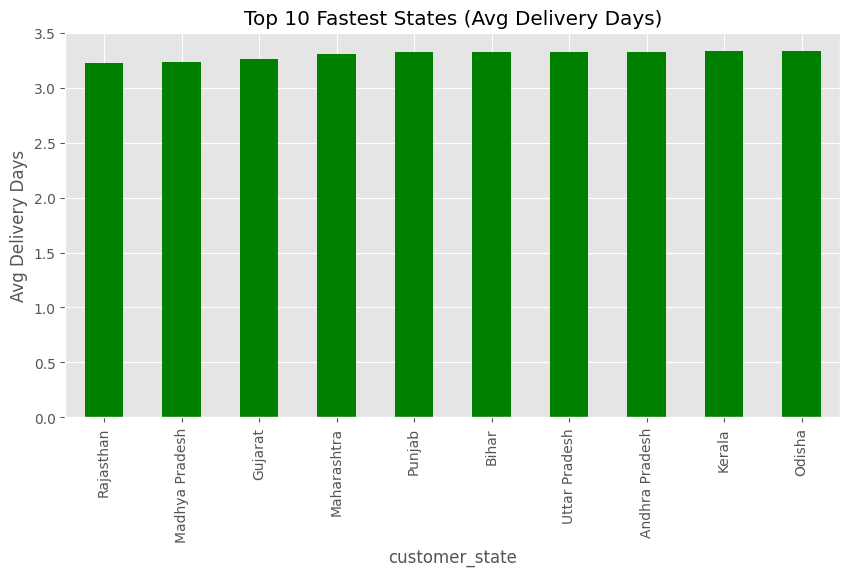

In [21]:
plt.figure(figsize=(10,5))
del_state.head(10).plot(kind="bar", color="green")
plt.title("Top 10 Fastest States (Avg Delivery Days)")
plt.ylabel("Avg Delivery Days")
plt.show()


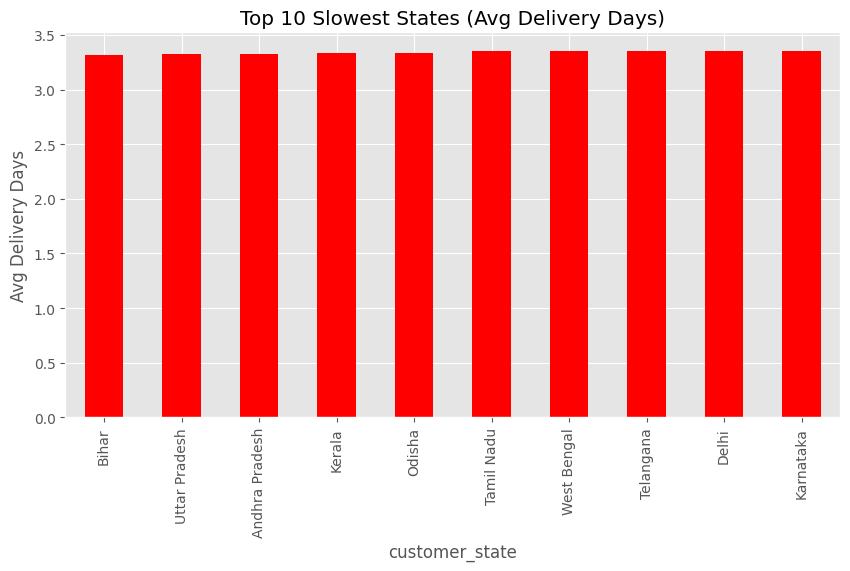

In [22]:
plt.figure(figsize=(10,5))
del_state.tail(10).plot(kind="bar", color="red")
plt.title("Top 10 Slowest States (Avg Delivery Days)")
plt.ylabel("Avg Delivery Days")
plt.show()


In [23]:
df_all["return_status"].unique()


array(['Delivered', 'Returned', 'Cancelled'], dtype=object)

In [24]:
return_cat = (
    df_all[df_all['return_status'] != "Cancelled"]
    .groupby("category")['return_status']
    .apply(lambda x: (x == "Returned").mean() * 100)
    .sort_values(ascending=False)
)

return_cat


category
Electronics    7.183021
Name: return_status, dtype: float64

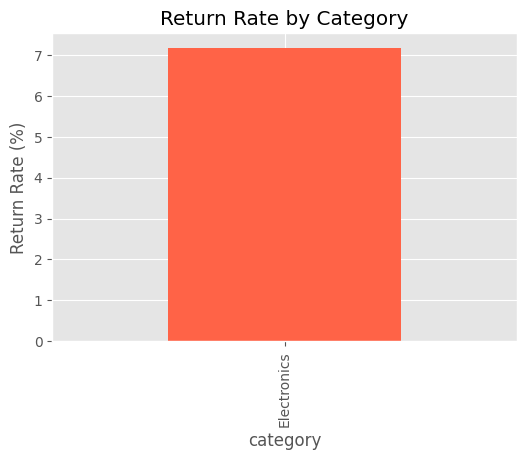

In [25]:
plt.figure(figsize=(6,4))
return_cat.plot(kind="bar", color="tomato")
plt.title("Return Rate by Category")
plt.ylabel("Return Rate (%)")
plt.show()


In [26]:
return_subcat = (
    df_all[df_all['return_status'] != "Cancelled"]
    .groupby("subcategory")['return_status']
    .apply(lambda x: (x == "Returned").mean() * 100)
    .sort_values(ascending=False)
)

return_subcat.head(10)


subcategory
Audio                 8.220707
Smart Watch           7.553073
Tablets               7.163361
Smartphones           7.126985
Laptops               7.050881
TV & Entertainment    5.943105
Name: return_status, dtype: float64

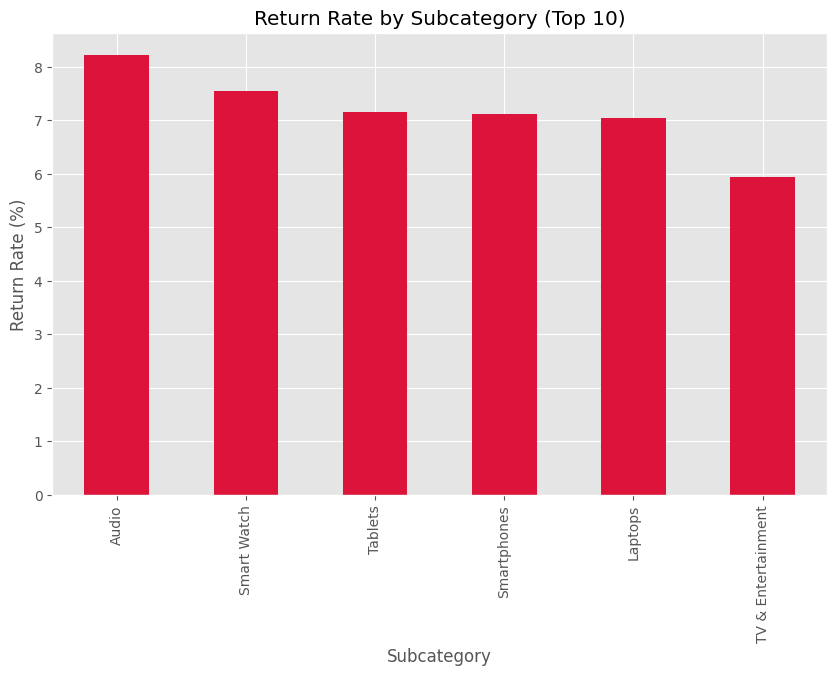

In [27]:
plt.figure(figsize=(10,6))
return_subcat.head(10).plot(kind="bar", color="crimson")
plt.title("Return Rate by Subcategory (Top 10)")
plt.ylabel("Return Rate (%)")
plt.xlabel("Subcategory")
plt.show()


In [28]:
return_brand = (
    df_all[df_all['return_status'] != "Cancelled"]
    .groupby("brand")['return_status']
    .apply(lambda x: (x == "Returned").mean() * 100)
    .sort_values(ascending=False)
)

return_brand.head(15)


brand
iQOO              9.585867
Sennheiser        9.508356
Boat              8.844416
Fitbit            8.525547
Audio-Technica    8.392351
Motorola          8.023810
Skullcandy        7.947478
Vivo              7.944645
Sony              7.932980
Noise             7.842943
Oppo              7.834380
JBL               7.800187
MSI               7.775640
Xiaomi            7.725545
Realme            7.669891
Name: return_status, dtype: float64

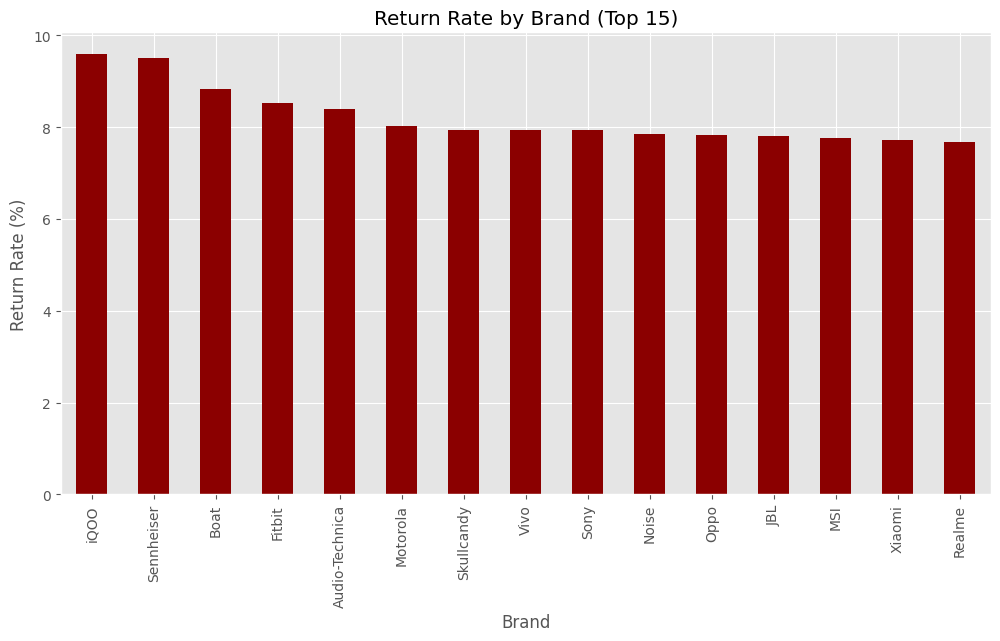

In [29]:
plt.figure(figsize=(12,6))
return_brand.head(15).plot(kind="bar", color="darkred")
plt.title("Return Rate by Brand (Top 15)")
plt.ylabel("Return Rate (%)")
plt.xlabel("Brand")
plt.show()


In [30]:
rating_return = df_all[['customer_rating', 'return_status']].copy()


In [31]:
rating_return['rating_band'] = pd.cut(
    rating_return['customer_rating'],
    bins=[0, 2, 3, 4, 5],
    labels=['0–2 ★', '2–3 ★', '3–4 ★', '4–5 ★']
)


In [32]:
return_by_rating = (
    rating_return[rating_return['return_status'] != 'Cancelled']
    .groupby('rating_band')['return_status']
    .apply(lambda x: (x == "Returned").mean() * 100)
    .sort_index()
)

return_by_rating


C:\Users\DELL\AppData\Local\Temp\ipykernel_12104\3628118157.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating_band')['return_status']


rating_band
0–2 ★         NaN
2–3 ★    7.821463
3–4 ★    7.464207
4–5 ★    6.924319
Name: return_status, dtype: float64

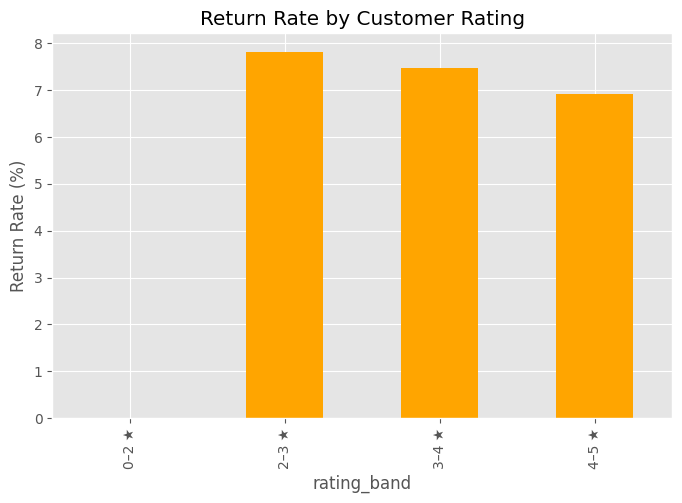

In [33]:
return_by_rating.plot(kind="bar", figsize=(8,5), color="orange")
plt.title("Return Rate by Customer Rating")
plt.ylabel("Return Rate (%)")
plt.show()


In [34]:
df_all['is_returned'] = (df_all['return_status'] == "Returned").astype(int)


In [35]:
df_all[['delivery_days', 'is_returned']].corr()


,delivery_days,is_returned
delivery_days,1.000000,0.011257
is_returned,0.011257,1.000000


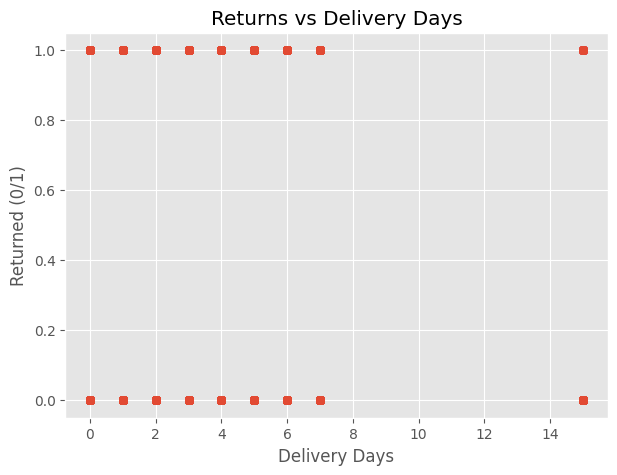

In [36]:
plt.figure(figsize=(7,5))
plt.scatter(df_all['delivery_days'], df_all['is_returned'], alpha=0.05)
plt.title("Returns vs Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Returned (0/1)")
plt.show()


In [37]:
return_year = (
    df_all[df_all['return_status'] != "Cancelled"]
    .groupby("order_year")['return_status']
    .apply(lambda x: (x == "Returned").mean() * 100)
    .reset_index(name="return_rate")
)

return_year


,order_year,return_rate
0,2015,7.257791
1,2016,6.997910
2,2017,7.184671
3,2018,7.139111
4,2019,7.056346
5,2020,7.092072
6,2021,7.187326
7,2022,7.272040
8,2023,7.375551
9,2024,7.165946


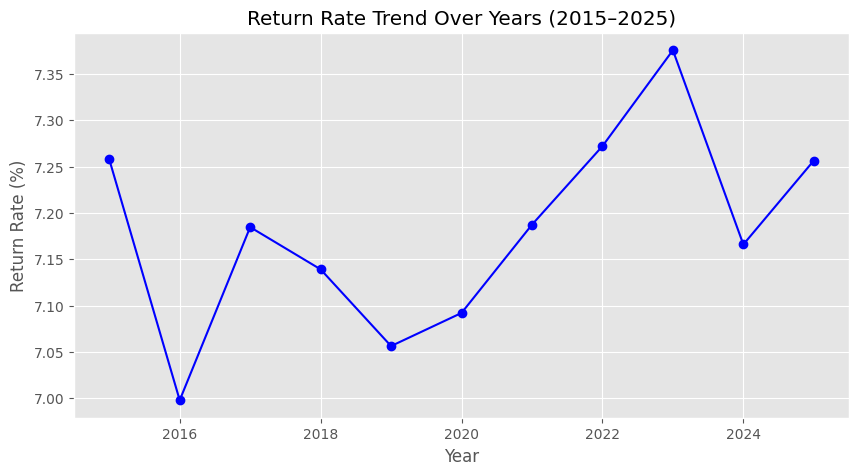

In [38]:
plt.figure(figsize=(10,5))
plt.plot(return_year['order_year'], return_year['return_rate'], marker='o', color='blue')
plt.title("Return Rate Trend Over Years (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Return Rate (%)")
plt.grid(True)
plt.show()


In [39]:
numeric_df = df_all.select_dtypes(include=['float64', 'int64'])


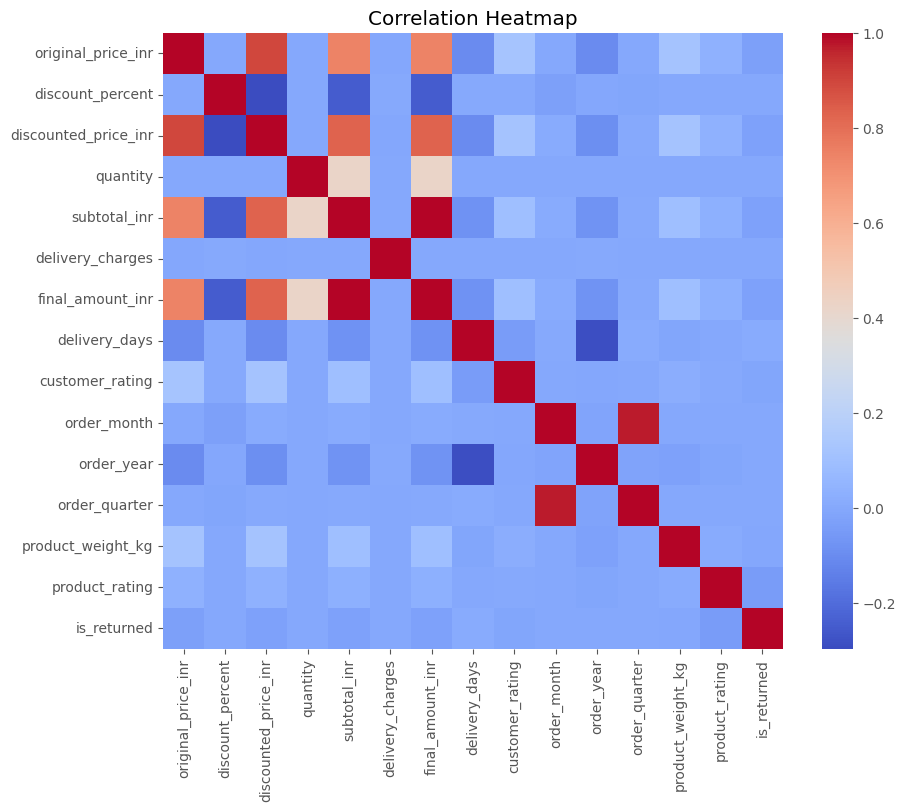

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [41]:
df_all['order_date'] = pd.to_datetime(df_all['order_date'], errors='coerce')


In [43]:
# Make sure order_date is datetime
df_all['order_date'] = pd.to_datetime(df_all['order_date'], errors='coerce')

today = df_all['order_date'].max()

rfm = (
    df_all.groupby("customer_id")
    .agg(
        recency=('order_date', lambda x: (today - x.max()).days),
        frequency=('transaction_id', 'nunique'),
        monetary=('final_amount_inr', 'sum')
    )
    .reset_index()
)

rfm.head()


,customer_id,recency,frequency,monetary
0,CUST_2015_00000001,2573,5,211034.56
1,CUST_2015_00000002,1419,10,632049.52
2,CUST_2015_00000003,3030,9,508294.02
3,CUST_2015_00000004,1668,8,812626.53
4,CUST_2015_00000005,2767,5,418011.46


In [46]:
# --- RFM scoring using ranks to avoid qcut errors ---

# Recency: lower days = better, so we want low recency → high score
recency_rank = rfm['recency'].rank(method='first', ascending=True)
rfm['R_score'] = pd.qcut(recency_rank, 5, labels=[5,4,3,2,1]).astype(int)

# Frequency: higher = better
freq_rank = rfm['frequency'].rank(method='first', ascending=False)
rfm['F_score'] = pd.qcut(freq_rank, 5, labels=[1,2,3,4,5]).astype(int)

# Monetary: higher = better
monetary_rank = rfm['monetary'].rank(method='first', ascending=False)
rfm['M_score'] = pd.qcut(monetary_rank, 5, labels=[1,2,3,4,5]).astype(int)

# Overall RFM score
rfm['RFM_Score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

rfm.head()


,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score
0,CUST_2015_00000001,2573,5,211034.56,1,1,2,4
1,CUST_2015_00000002,1419,10,632049.52,3,1,1,5
2,CUST_2015_00000003,3030,9,508294.02,1,1,1,3
3,CUST_2015_00000004,1668,8,812626.53,2,1,1,4
4,CUST_2015_00000005,2767,5,418011.46,1,1,1,3


In [47]:
def assign_segment(row):
    r = row['R_score']
    f = row['F_score']
    m = row['M_score']
    
    # Champions: best in all three
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    
    # Loyal: buy frequently & spend well
    if f >= 4 and m >= 3:
        return "Loyal Customers"
    
    # Big Spenders but not very frequent
    if m >= 4 and f <= 3:
        return "Big Spenders"
    
    # At Risk: used to buy often, but haven’t bought recently
    if r <= 2 and f >= 3:
        return "At Risk"
    
    # Newish / low activity
    if r >= 4 and f <= 2:
        return "New / Inactive"
    
    return "Others"

rfm["segment"] = rfm.apply(assign_segment, axis=1)
rfm["segment"].value_counts()


segment
Others             120689
Loyal Customers     76229
Champions           50896
New / Inactive      44830
Big Spenders        38630
At Risk             23695
Name: count, dtype: int64

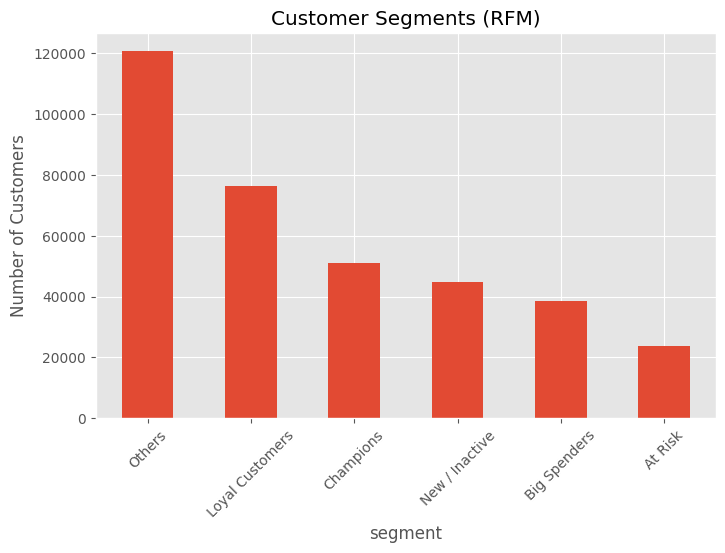

In [48]:
plt.figure(figsize=(8,5))
rfm["segment"].value_counts().plot(kind="bar")
plt.title("Customer Segments (RFM)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [49]:
from pathlib import Path
import sqlite3

# Path for the SQLite database file (it will be created if it doesn't exist)
db_path = Path("../sql/amazon_india.db")

# Connect to the database
conn = sqlite3.connect(db_path)

print("Connected to SQLite DB at:", db_path.resolve())


Connected to SQLite DB at: C:\Users\DELL\Desktop\amazon_project\sql\amazon_india.db


In [51]:
from pathlib import Path
import sqlite3

db_path = Path("../sql/amazon_india.db")
conn = sqlite3.connect(db_path)

print("Connected to SQLite DB at:", db_path.resolve())


Connected to SQLite DB at: C:\Users\DELL\Desktop\amazon_project\sql\amazon_india.db


In [52]:
df_all.to_sql(
    "orders_cleaned",
    conn,
    if_exists="replace",
    index=False,
    chunksize=50000   # writes 50k rows at a time
)

print("Table 'orders_cleaned' created successfully in chunks!")


Table 'orders_cleaned' created successfully in chunks!


In [53]:
import pandas as pd

test = pd.read_sql_query(
    """
    SELECT order_year,
           COUNT(*) AS total_orders,
           SUM(final_amount_inr) AS total_revenue
    FROM orders_cleaned
    GROUP BY order_year
    ORDER BY order_year;
    """,
    conn
)

test


,order_year,total_orders,total_revenue
0,2015,33165,2.142163e+09
1,2016,55275,3.598316e+09
2,2017,77385,5.510026e+09
3,2018,99495,7.248545e+09
4,2019,121605,8.605901e+09
5,2020,143715,1.187319e+10
6,2021,138187,1.099021e+10
7,2022,132660,8.532312e+09
8,2023,127132,7.712999e+09
9,2024,121605,6.823413e+09


In [3]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect("amazon_sales.db")


In [5]:
import sqlite3
from pathlib import Path

db_path = Path("../sql/amazon_india.db").resolve()
print("DB path:", db_path)

# Open a fresh connection to the same file
conn = sqlite3.connect(str(db_path))
cur = conn.cursor()

# List tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print("Tables in DB:", tables)

# If orders_cleaned exists show a quick row-count
if ('orders_cleaned',) in tables:
    cur.execute("SELECT COUNT(*) FROM orders_cleaned;")
    cnt = cur.fetchone()[0]
    print("orders_cleaned row count:", cnt)
else:
    print("orders_cleaned not found in this DB connection.")


DB path: C:\Users\DELL\Desktop\amazon_project\sql\amazon_india.db
Tables in DB: [('orders_cleaned',)]
orders_cleaned row count: 1127609


In [6]:
index_sql = """
CREATE INDEX IF NOT EXISTS idx_orders_year     ON orders_cleaned(order_year);
CREATE INDEX IF NOT EXISTS idx_orders_month    ON orders_cleaned(order_month);
CREATE INDEX IF NOT EXISTS idx_orders_state    ON orders_cleaned(customer_state);
CREATE INDEX IF NOT EXISTS idx_orders_city     ON orders_cleaned(customer_city);
CREATE INDEX IF NOT EXISTS idx_orders_cat      ON orders_cleaned(category);
CREATE INDEX IF NOT EXISTS idx_orders_subcat   ON orders_cleaned(subcategory);
CREATE INDEX IF NOT EXISTS idx_orders_brand    ON orders_cleaned(brand);
CREATE INDEX IF NOT EXISTS idx_orders_customer ON orders_cleaned(customer_id);
CREATE INDEX IF NOT EXISTS idx_orders_txn      ON orders_cleaned(transaction_id);
"""

cur = conn.cursor()
cur.executescript(index_sql)
conn.commit()
print("Indexes created successfully!")


Indexes created successfully!


In [7]:
# Create customers, products and time_dim tables from orders_cleaned
dim_sql = """
CREATE TABLE IF NOT EXISTS customers AS
SELECT DISTINCT
  customer_id,
  customer_city,
  customer_state,
  customer_tier,
  customer_spending_tier,
  customer_age_group,
  is_prime_member,
  is_prime_eligible
FROM orders_cleaned;

CREATE TABLE IF NOT EXISTS products AS
SELECT DISTINCT
  product_id,
  product_name,
  category,
  subcategory,
  brand,
  product_weight_kg,
  product_rating
FROM orders_cleaned;

CREATE TABLE IF NOT EXISTS time_dim AS
SELECT DISTINCT
  order_year,
  order_month,
  order_quarter
FROM orders_cleaned;
"""

cur = conn.cursor()
cur.executescript(dim_sql)
conn.commit()
print("Dimension tables (customers, products, time_dim) created successfully!")


Dimension tables (customers, products, time_dim) created successfully!


In [8]:
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cur.fetchall()]
print("Tables in DB:", tables)

for t in ["customers", "products", "time_dim"]:
    if t in tables:
        cur.execute(f"SELECT COUNT(*) FROM {t};")
        print(f"{t} rows:", cur.fetchone()[0])
    else:
        print(f"{t} not found")


Tables in DB: ['orders_cleaned', 'customers', 'products', 'time_dim']
customers rows: 573858
products rows: 2004
time_dim rows: 132


In [9]:
import pandas as pd

q1 = """
SELECT category,
       SUM(final_amount_inr) AS revenue,
       COUNT(*) AS orders
FROM orders_cleaned
GROUP BY category
ORDER BY revenue DESC
LIMIT 10;
"""
print(pd.read_sql_query(q1, conn))


      category       revenue   orders
0  Electronics  7.688873e+10  1127609


In [10]:
q2 = """
SELECT brand,
       SUM(final_amount_inr) AS revenue,
       COUNT(*) AS orders
FROM orders_cleaned
GROUP BY brand
ORDER BY revenue DESC
LIMIT 10;
"""
print(pd.read_sql_query(q2, conn))


       brand       revenue  orders
0    Samsung  2.062142e+10  222664
1      Apple  1.632240e+10  111827
2    OnePlus  1.232417e+10  174329
3     Xiaomi  5.450159e+09  156154
4     Realme  3.015664e+09   84696
5       Vivo  2.348077e+09   71176
6       Oppo  2.268237e+09   71205
7     Lenovo  2.084388e+09   22733
8  Alienware  1.659859e+09   14683
9       ASUS  1.458950e+09   13062


In [11]:
q3 = """
SELECT 
    order_year,
    order_month,
    SUM(final_amount_inr) AS revenue
FROM orders_cleaned
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

print(pd.read_sql_query(q3, conn))


     order_year  order_month       revenue
0          2015            1  1.631200e+08
1          2015            2  1.443615e+08
2          2015            3  1.452314e+08
3          2015            4  1.780212e+08
4          2015            5  1.568690e+08
..          ...          ...           ...
127        2025            8  3.228410e+08
128        2025            9  3.111859e+08
129        2025           10  3.155934e+08
130        2025           11  3.656632e+08
131        2025           12  5.147090e+08

[132 rows x 3 columns]


In [12]:
q4 = """
SELECT 
    order_year,
    payment_method,
    SUM(final_amount_inr) AS revenue,
    COUNT(*) AS total_orders
FROM orders_cleaned
GROUP BY order_year, payment_method
ORDER BY order_year, revenue DESC;
"""

print(pd.read_sql_query(q4, conn))


    order_year payment_method       revenue  total_orders
0         2015            COD  1.609061e+09         24962
1         2015           Card  4.274830e+08          6607
2         2015    Net Banking  1.056192e+08          1596
3         2016            COD  2.512673e+09         38735
4         2016           Card  8.756870e+08         13251
5         2016    Net Banking  1.357163e+08          2152
6         2016            UPI  7.423914e+07          1137
7         2017            COD  3.312505e+09         46386
8         2017           Card  1.540074e+09         21677
9         2017            UPI  3.823763e+08          5471
10        2017    Net Banking  2.750707e+08          3851
11        2018            COD  3.617422e+09         49707
12        2018           Card  2.248328e+09         30888
13        2018            UPI  9.426308e+08         12895
14        2018    Net Banking  4.401640e+08          6005
15        2019            COD  3.444333e+09         48696
16        2019

In [13]:
q5 = """
SELECT 
    customer_state,
    SUM(final_amount_inr) AS revenue,
    COUNT(*) AS total_orders
FROM orders_cleaned
GROUP BY customer_state
ORDER BY revenue DESC
LIMIT 20;
"""

state_rev = pd.read_sql_query(q5, conn)
state_rev


,customer_state,revenue,total_orders
0,Maharashtra,1.755014e+10,246558
1,Delhi,9.282344e+09,123469
2,Tamil Nadu,7.923753e+09,111448
3,Karnataka,7.680945e+09,102523
4,Gujarat,7.183017e+09,112339
5,Uttar Pradesh,6.793803e+09,118403
6,West Bengal,5.053097e+09,66867
7,Telangana,3.335962e+09,44573
8,Rajasthan,2.644470e+09,40453
9,Madhya Pradesh,2.214093e+09,33592


In [14]:
q6 = """
SELECT 
    customer_city,
    SUM(final_amount_inr) AS revenue,
    COUNT(*) AS total_orders
FROM orders_cleaned
GROUP BY customer_city
ORDER BY revenue DESC
LIMIT 20;
"""

city_rev = pd.read_sql_query(q6, conn)
city_rev


,customer_city,revenue,total_orders
0,Mumbai,1.061793e+10,141076
1,Delhi,9.242046e+09,122883
2,Bangalore,7.621644e+09,101693
3,Chennai,6.377471e+09,84207
4,Kolkata,5.033587e+09,66603
5,Pune,4.445595e+09,67703
6,Hyderabad,3.335962e+09,44573
7,Ahmedabad,3.300497e+09,50861
8,Surat,2.666742e+09,40400
9,Jaipur,2.644470e+09,40453


In [15]:
q7_fast = """
SELECT 
    customer_state,
    ROUND(AVG(delivery_days), 3) AS avg_delivery_days
FROM orders_cleaned
GROUP BY customer_state
ORDER BY avg_delivery_days ASC
LIMIT 10;
"""

fast_states = pd.read_sql_query(q7_fast, conn)
fast_states


,customer_state,avg_delivery_days
0,Rajasthan,3.226
1,Madhya Pradesh,3.232
2,Gujarat,3.257
3,Maharashtra,3.308
4,Punjab,3.319
5,Bihar,3.321
6,Uttar Pradesh,3.323
7,Andhra Pradesh,3.325
8,Kerala,3.333
9,Odisha,3.334


In [16]:
q7_slow = """
SELECT 
    customer_state,
    ROUND(AVG(delivery_days), 3) AS avg_delivery_days
FROM orders_cleaned
GROUP BY customer_state
ORDER BY avg_delivery_days DESC
LIMIT 10;
"""

slow_states = pd.read_sql_query(q7_slow, conn)
slow_states


,customer_state,avg_delivery_days
0,Karnataka,3.356
1,Delhi,3.355
2,Telangana,3.354
3,West Bengal,3.354
4,Tamil Nadu,3.349
5,Odisha,3.334
6,Kerala,3.333
7,Andhra Pradesh,3.325
8,Uttar Pradesh,3.323
9,Bihar,3.321


In [17]:
q8 = """
SELECT 
    category,
    COUNT(*) AS total_orders,
    SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS total_returns,
    ROUND( (CAST(SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS FLOAT)
           / COUNT(*)) * 100 , 3) AS return_rate_percent
FROM orders_cleaned
GROUP BY category
ORDER BY return_rate_percent DESC;
"""

cat_returns = pd.read_sql_query(q8, conn)
cat_returns


,category,total_orders,total_returns,return_rate_percent
0,Electronics,1127609,79125,7.017


In [18]:
q9 = """
SELECT 
    subcategory,
    COUNT(*) AS total_orders,
    SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS total_returns,
    ROUND( (CAST(SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS FLOAT)
           / COUNT(*)) * 100 , 3) AS return_rate_percent
FROM orders_cleaned
GROUP BY subcategory
HAVING total_orders > 500   -- optional filter to avoid tiny subcategories
ORDER BY return_rate_percent DESC;
"""

subcat_returns = pd.read_sql_query(q9, conn)
subcat_returns


,subcategory,total_orders,total_returns,return_rate_percent
0,Audio,50623,4051,8.002
1,Smart Watch,74708,5504,7.367
2,Tablets,70254,4916,6.997
3,Smartphones,827177,57604,6.964
4,Laptops,88370,6089,6.890
5,TV & Entertainment,16477,961,5.832


In [19]:
q10 = """
SELECT 
    brand,
    COUNT(*) AS total_orders,
    SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS total_returns,
    ROUND( (CAST(SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS FLOAT)
           / COUNT(*)) * 100 , 3) AS return_rate_percent
FROM orders_cleaned
GROUP BY brand
HAVING total_orders > 500   -- avoid small brands
ORDER BY return_rate_percent DESC
LIMIT 20;
"""

brand_returns = pd.read_sql_query(q10, conn)
brand_returns


,brand,total_orders,total_returns,return_rate_percent
0,iQOO,3553,331,9.316
1,Sennheiser,6338,586,9.246
2,Boat,4818,411,8.531
3,Fitbit,10563,876,8.293
4,Audio-Technica,8689,711,8.183
5,Motorola,34535,2696,7.807
6,Vivo,71176,5517,7.751
7,Sony,5989,464,7.748
8,Skullcandy,4468,345,7.722
9,Noise,10371,793,7.646


In [20]:
q11 = """
SELECT 
    CASE 
        WHEN customer_rating < 2 THEN '0–2 ★'
        WHEN customer_rating < 3 THEN '2–3 ★'
        WHEN customer_rating < 4 THEN '3–4 ★'
        ELSE '4–5 ★'
    END AS rating_band,
    COUNT(*) AS total_orders,
    SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS total_returns,
    ROUND(
        (CAST(SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS FLOAT)
        / COUNT(*)) * 100, 3
    ) AS return_rate_percent
FROM orders_cleaned
WHERE customer_rating IS NOT NULL
GROUP BY rating_band
ORDER BY rating_band;
"""

rating_returns = pd.read_sql_query(q11, conn)
rating_returns


,rating_band,total_orders,total_returns,return_rate_percent
0,3–4 ★,117818,8788,7.459
1,4–5 ★,611551,42250,6.909


In [21]:
q12 = """
SELECT
    ROUND(delivery_days, 0) AS delivery_day,
    COUNT(*) AS total_orders,
    SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS total_returns,
    ROUND(
        (CAST(SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS FLOAT)
        / COUNT(*)) * 100, 3
    ) AS return_rate_percent
FROM orders_cleaned
GROUP BY delivery_day
ORDER BY delivery_day;
"""

delivery_returns = pd.read_sql_query(q12, conn)
delivery_returns


,delivery_day,total_orders,total_returns,return_rate_percent
0,0.0,6687,514,7.687
1,1.0,219615,14414,6.563
2,2.0,130814,8420,6.437
3,3.0,288488,20190,6.999
4,4.0,206438,15378,7.449
5,5.0,136608,10042,7.351
6,6.0,102668,7534,7.338
7,7.0,34116,2487,7.290
8,15.0,2175,146,6.713


In [22]:
q13 = """
SELECT 
    order_year,
    COUNT(*) AS total_orders,
    SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS returned_orders,
    ROUND(
        (CAST(SUM(CASE WHEN return_status = 'Returned' THEN 1 ELSE 0 END) AS FLOAT)
        / COUNT(*)) * 100, 3
    ) AS return_rate_percent
FROM orders_cleaned
GROUP BY order_year
ORDER BY order_year;
"""

yearly_returns = pd.read_sql_query(q13, conn)
yearly_returns


,order_year,total_orders,returned_orders,return_rate_percent
0,2015,33165,2350,7.086
1,2016,55275,3783,6.844
2,2017,77385,5437,7.026
3,2018,99495,6942,6.977
4,2019,121605,8378,6.890
5,2020,143715,9955,6.927
6,2021,138187,9709,7.026
7,2022,132660,9421,7.102
8,2023,127132,9158,7.204
9,2024,121605,8513,7.001


In [23]:
today = pd.to_datetime(pd.read_sql_query(
    "SELECT MAX(order_date) AS max_date FROM orders_cleaned", conn
)['max_date'][0])

today


Timestamp('2025-12-31 00:00:00')

In [24]:
q14 = f"""
SELECT
    customer_id,

    -- Recency: days since last order
    CAST((julianday('{today.date()}') - julianday(MAX(order_date))) AS INTEGER) AS recency,

    -- Frequency: number of orders
    COUNT(*) AS frequency,

    -- Monetary: total revenue
    SUM(final_amount_inr) AS monetary

FROM orders_cleaned
GROUP BY customer_id
ORDER BY customer_id;
"""

rfm_sql = pd.read_sql_query(q14, conn)
rfm_sql.head()


,customer_id,recency,frequency,monetary
0,CUST_2015_00000001,2573,5,211034.56
1,CUST_2015_00000002,1419,10,632049.52
2,CUST_2015_00000003,3030,9,508294.02
3,CUST_2015_00000004,1668,8,812626.53
4,CUST_2015_00000005,2767,5,418011.46


In [28]:
# Robust RFM scoring (safe for tied/low-unique frequency values)
import pandas as pd

def safe_rank_qcut(series, q_desired, labels=None, rank_ascending=True):
    """
    Rank the series then qcut on the rank. Automatically reduces q if there
    are fewer unique values. Returns a Categorical result (same shape).
    """
    # create ranks to break ties deterministically
    ranks = series.rank(method='first', ascending=rank_ascending)
    uniq_vals = ranks.nunique()
    q_use = min(q_desired, uniq_vals)
    if q_use < 2:
        q_use = 2

    # build default labels if not provided
    if labels is None:
        # labels from 1..q_use
        labs = list(range(1, q_use + 1))
    else:
        # trim/adjust labels if needed
        if len(labels) != q_use:
            labs = labels[:q_use]
        else:
            labs = labels

    return pd.qcut(ranks, q_use, labels=labs, duplicates='drop')

# ---- apply to your rfm_sql dataframe ----
# (assumes rfm_sql has columns: customer_id, recency, frequency, monetary)
# If any columns are missing, run the SQL RFM extraction step again.

# R: lower recency -> better, so rank ascending=True (lowest recency -> rank 1)
rfm_sql['R_score_cat'] = safe_rank_qcut(rfm_sql['recency'], q_desired=5, labels=[5,4,3,2,1], rank_ascending=True)

# F: higher frequency -> better, so rank descending (highest freq -> rank 1)
# We'll allow automatic bin count if unique frequencies are small
# labels should be ascending 1..q for F (1 = lowest freq, q = highest freq)
# But since we rank descending, we want higher ranks -> label high; using labels=[1..q] on descending ranks will give highest freq highest label
rfm_sql['F_score_cat'] = safe_rank_qcut(rfm_sql['frequency'], q_desired=5, labels=[1,2,3,4,5], rank_ascending=False)

# M: higher monetary -> better, rank descending
rfm_sql['M_score_cat'] = safe_rank_qcut(rfm_sql['monetary'], q_desired=5, labels=[1,2,3,4,5], rank_ascending=False)

# Convert category labels to integers (safe cast)
def cat_to_int(col):
    # some bins may have fewer categories than desired; fill NaN with lowest label then cast
    if pd.api.types.is_categorical_dtype(rfm_sql[col]):
        # convert categories to their codes + 1 (if numeric labels were used, we can convert directly)
        try:
            return rfm_sql[col].astype(int)
        except Exception:
            # fallback: convert categories to numeric labels by mapping
            mapping = {cat: i+1 for i, cat in enumerate(rfm_sql[col].cat.categories)}
            return rfm_sql[col].map(mapping).astype(int)
    else:
        # if not categorical (rare), try converting to numeric
        return pd.to_numeric(rfm_sql[col], errors='coerce').fillna(1).astype(int)

rfm_sql['R_score'] = cat_to_int('R_score_cat')
rfm_sql['F_score'] = cat_to_int('F_score_cat')
rfm_sql['M_score'] = cat_to_int('M_score_cat')

# Calculate combined score
rfm_sql['RFM_Score'] = rfm_sql['R_score'] + rfm_sql['F_score'] + rfm_sql['M_score']

# Optional: create human-readable segment labels (tweak rules as you like)
def assign_segment(row):
    r, f, m = row['R_score'], row['F_score'], row['M_score']
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    if f >= 4 and m >= 3:
        return "Loyal Customers"
    if m >= 4 and f <= 3:
        return "Big Spenders"
    if r <= 2 and f >= 3:
        return "At Risk"
    if r >= 4 and f <= 2:
        return "New / Inactive"
    return "Others"

rfm_sql['segment'] = rfm_sql.apply(assign_segment, axis=1)

# Show the top 10 rows to verify
display(rfm_sql.head(10))

# (optional) save back to SQL for later use
# rfm_sql.to_sql("rfm_customers", conn, if_exists="replace", index=False)
print("\nRFM scoring completed. R/F/M score ranges:")
print("R:", rfm_sql['R_score'].min(), "-", rfm_sql['R_score'].max())
print("F:", rfm_sql['F_score'].min(), "-", rfm_sql['F_score'].max())
print("M:", rfm_sql['M_score'].min(), "-", rfm_sql['M_score'].max())
print("RFM:", rfm_sql['RFM_Score'].min(), "-", rfm_sql['RFM_Score'].max())
print("\nTop segments count:\n", rfm_sql['segment'].value_counts().head(10))


C:\Users\DELL\AppData\Local\Temp\ipykernel_2296\2362647844.py:48: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(rfm_sql[col]):
C:\Users\DELL\AppData\Local\Temp\ipykernel_2296\2362647844.py:48: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(rfm_sql[col]):
C:\Users\DELL\AppData\Local\Temp\ipykernel_2296\2362647844.py:48: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(rfm_sql[col]):


,customer_id,recency,frequency,monetary,R_score,R_score_cat,F_score_cat,M_score_cat,F_score,M_score,RFM_Score,segment
0,CUST_2015_00000001,2573,5,211034.56,1,1,1,2,1,2,4,Others
1,CUST_2015_00000002,1419,10,632049.52,3,3,1,1,1,1,5,Others
2,CUST_2015_00000003,3030,9,508294.02,1,1,1,1,1,1,3,Others
3,CUST_2015_00000004,1668,8,812626.53,2,2,1,1,1,1,4,Others
4,CUST_2015_00000005,2767,5,418011.46,1,1,1,1,1,1,3,Others
5,CUST_2015_00000006,412,11,2192722.94,5,5,1,1,1,1,7,New / Inactive
6,CUST_2015_00000007,2253,9,319108.47,1,1,1,2,1,2,4,Others
7,CUST_2015_00000008,3964,1,122254.49,1,1,4,3,4,3,8,Loyal Customers
8,CUST_2015_00000009,2193,10,721615.85,2,2,1,1,1,1,4,Others
9,CUST_2015_00000010,2220,6,250071.87,1,1,1,2,1,2,4,Others



RFM scoring completed. R/F/M score ranges:
R: 1 - 5
F: 1 - 5
M: 1 - 5
RFM: 3 - 15

Top segments count:
 segment
Others             120689
Loyal Customers     76229
Champions           50896
New / Inactive      44830
Big Spenders        38630
At Risk             23695
Name: count, dtype: int64


In [29]:
# save RFM table back to SQLite for later joins / queries
rfm_sql.to_sql("rfm_customers", conn, if_exists="replace", index=False)
print("Saved rfm_customers to SQLite DB (table: rfm_customers).")


Saved rfm_customers to SQLite DB (table: rfm_customers).


In [30]:
# show counts per segment and top RFM rows
print("Segments count:\n", rfm_sql['segment'].value_counts())
display(rfm_sql.sort_values(['RFM_Score'], ascending=False).head(10))


Segments count:
 segment
Others             120689
Loyal Customers     76229
Champions           50896
New / Inactive      44830
Big Spenders        38630
At Risk             23695
Name: count, dtype: int64


,customer_id,recency,frequency,monetary,R_score,R_score_cat,F_score_cat,M_score_cat,F_score,M_score,RFM_Score,segment
345335,CUST_2025_00015798,151,1,19111.06,5,5,5,5,5,5,15,Champions
345308,CUST_2025_00015765,214,1,18769.35,5,5,5,5,5,5,15,Champions
354946,CUST_2025_00027975,172,1,30453.25,5,5,5,5,5,5,15,Champions
354948,CUST_2025_00027977,19,1,49127.33,5,5,5,5,5,5,15,Champions
354965,CUST_2025_00027997,128,1,25770.92,5,5,5,5,5,5,15,Champions
305856,CUST_2024_00010675,439,1,44335.83,5,5,5,5,5,5,15,Champions
301997,CUST_2024_00005891,459,1,30590.01,5,5,5,5,5,5,15,Champions
301999,CUST_2024_00005896,436,1,13082.10,5,5,5,5,5,5,15,Champions
340074,CUST_2025_00009225,37,1,44861.78,5,5,5,5,5,5,15,Champions
345313,CUST_2025_00015771,32,1,18361.24,5,5,5,5,5,5,15,Champions


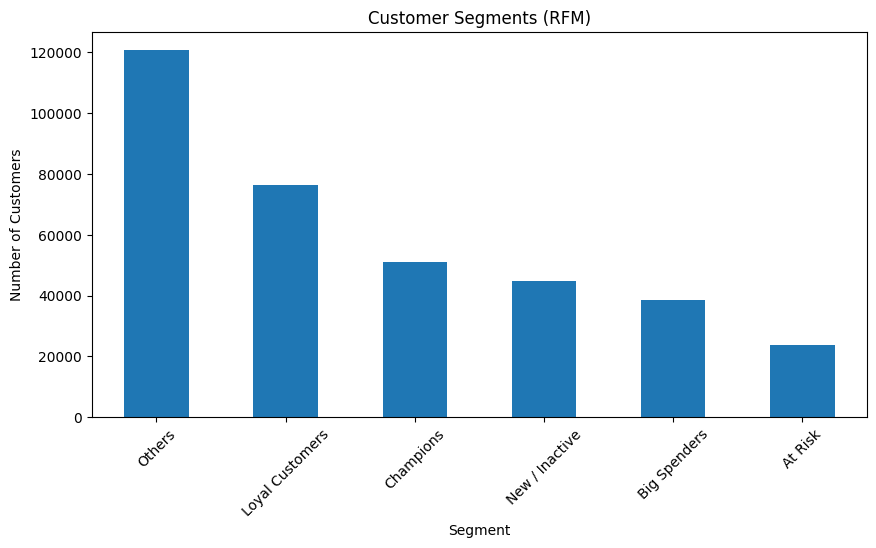

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
rfm_sql['segment'].value_counts().plot(kind='bar')
plt.title("Customer Segments (RFM)")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.show()


In [32]:
out_path = "../data_cleaned/rfm_customers.csv"
rfm_sql.to_csv(out_path, index=False)
print("RFM CSV saved to:", out_path)


RFM CSV saved to: ../data_cleaned/rfm_customers.csv


In [35]:
import pandas as pd

# Correct relative path (because notebook is inside /notebooks/)
rfm_csv_path = "../sql/rfm_customers.csv"

rfm_df = pd.read_csv(rfm_csv_path)

# Write into DB
rfm_df.to_sql("rfm_customers", conn, if_exists="replace", index=False)

print("RFM table stored successfully in SQL!")


RFM table stored successfully in SQL!
